# Метод Пиявского

In [11]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import time
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [34]:
f = lambda x: (x**2+1)**2-(x+5)**2-6
interval = [-3, 3]

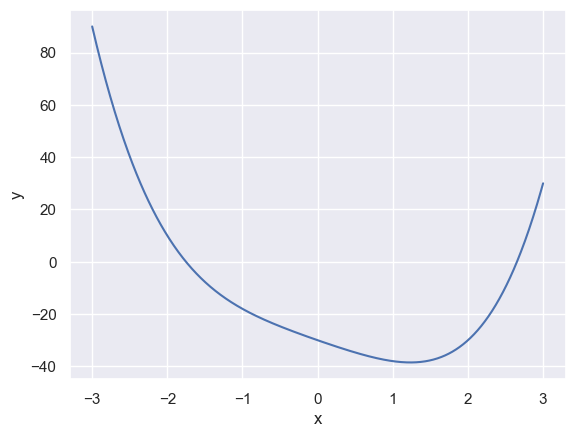

In [35]:
partition = np.linspace(interval[0], interval[1], 1000)

plt.plot(partition, f(partition))
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Константа Липшица

In [36]:
def estimate_L(f, h, partition):
    return 2 * np.max(np.abs(f(partition[:-1]) - f(partition[1:]))/h)
h = (partition[1:] - partition[:-1])[0]
L = estimate_L(f, h, partition)
L

247.34020463664015

### Another way to implement the algorithm with compact selection

In [41]:
%%time
init_points = np.array(interval)
x_old_opt = interval[1]
x_opt_array = []
function_array = []

for iter in range(1000):
    fp = f(init_points)
    f_opt = np.min(fp)
    new_compact = partition[np.where(f(partition) < f_opt)[0]]
    k = len(init_points)
    
    if not new_compact.any():
        break
    
    max_array = []
    for i in range(k):
        max_array.append(np.max(fp[i] - L * np.abs(new_compact - init_points[i])))
        
        function_array.append(fp[i] - L * np.abs(new_compact - init_points[i]))
    
    x_opt = new_compact[np.argmin(max_array)]
    x_opt_array.append(x_opt)
    
    if np.abs(x_opt - x_old_opt) < 1e-6:
        break
    
    x_old_opt = x_opt
    init_points = np.append(init_points, x_opt)
    
x_opt_array = np.array(x_opt_array)
x_opt

CPU times: user 2.79 s, sys: 221 ms, total: 3.01 s
Wall time: 3.13 s


1.2342342342342345

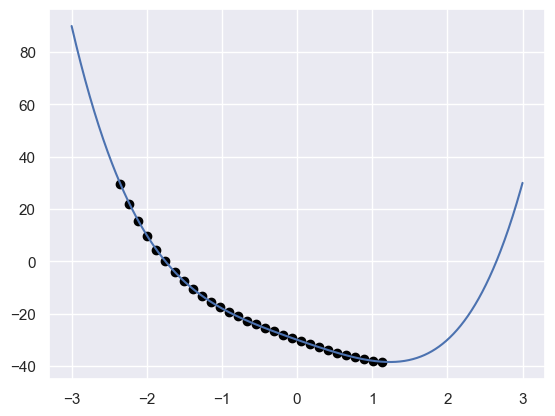

In [42]:
plt.plot(partition, f(partition))
plt.scatter(x_opt_array[::20], f(x_opt_array[::20]), color='black')

plt.show()

### Сравниваем со scipy реализацией

In [43]:
%%time
from scipy.optimize import minimize
scipy_res = minimize(f, x0=interval[0], bounds=[(interval[0], interval[1])]).x[0]
niter_scipy = minimize(f, x0=interval[0], bounds=[(interval[0], interval[1])]).nit

CPU times: user 9.27 ms, sys: 1.78 ms, total: 11.1 ms
Wall time: 11.5 ms


In [44]:
scipy_res

1.2347727786498355